# TensorFlow: Simple quadratic model (Keras)

* Using Keras

In [7]:
import tensorflow as tf
import keras
from matplotlib import pyplot as plt

In [9]:
def plot_preds(x, y, f, model, title):
  plt.figure()
  plt.plot(x, y, '.', label='Data')
  plt.plot(x, f(x), label='Ground truth')
  plt.plot(x, model(x), label='Predictions')
  plt.title(title)
  plt.legend()

In [ ]:
def f(x):
  y = x**2 + 2*x - 5
  return y

In [ ]:
x = tf.linspace(-2.0, 2.0, 201)
y = f(x) + tf.random.normal(shape=[201])

In [ ]:
model = keras.Sequential([
    keras.layers.Lambda(lambda x: tf.stack([x, x**2], axis=1)),
    keras.layers.Dense(units=1, kernel_initializer=tf.random.normal)
])

In [ ]:
model.compile(
    loss=keras.losses.MeanSquaredError,
    optimizer=keras.optimizers.SGD(learning_rate=0.01))

history = model.fit(x, y,
    epochs=100,
    batch_size=32,
    verbose=0)

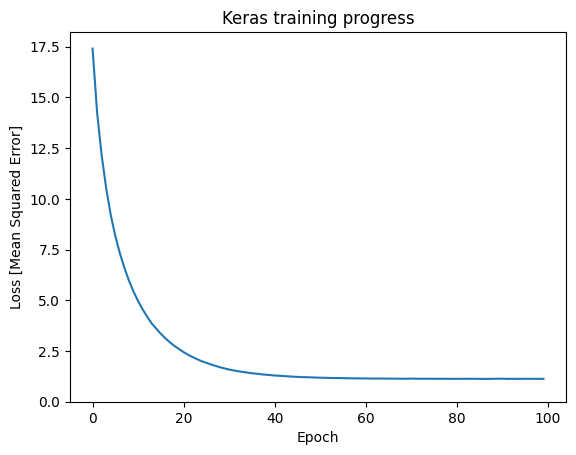

In [8]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');

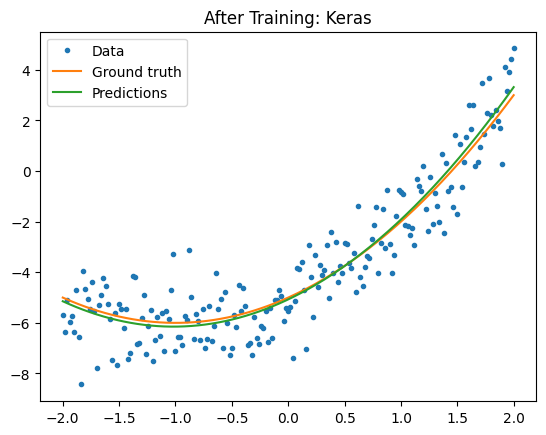

In [10]:
plot_preds(x, y, f, model, 'After Training: Keras')